In [20]:
import matplotlib.pyplot as plt
import numpy as np 
import PIL

In [21]:
def normalize_image(image_1d):
  img_mean = np.mean(image_1d)
  img_std = np.std(image_1d)
  image_1d = (image_1d - img_mean)/img_std
  return image_1d, img_mean, img_std

In [22]:
 def kmeans_data_initialize(image_name):
    image = PIL.Image.open(image_name)
    img_1d = np.array(image)
    image_shape = img_1d.shape
    img_1d = img_1d.reshape((image_shape[0]*image_shape[1], image_shape[-1]))
    return img_1d, image_shape

In [23]:
def cdist(img_1d, centroids, form='euclidian'):
    dist_list = []
    for pixel in img_1d:
        dist = []
        for centroid in centroids:
            dist.append(np.linalg.norm(pixel - centroid))
        dist_list.append(dist)
    return np.array(dist_list)

In [24]:
def assign_color(img_1d, centroids):
    image = cdist(img_1d, centroids)
    return np.argmin(image, axis=1)

In [25]:
def update_centroids(img_1d, colors, k_clusters):
    centroids = np.zeros((k_clusters, img_1d.shape[-1]))
    for cluster in range(k_clusters):
        pixels_belong_cluster = img_1d[colors == cluster, :]
        centroids[cluster] = np.mean(pixels_belong_cluster, axis=0)
    return centroids 

In [26]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
  if init_centroids == r'in_pixels':
    centroids = img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace='False')]
  else:
    centroids = np.random.randint(255, size=(k_clusters,img_1d.shape[-1]))
  colors = np.zeros(len(centroids))
  for epoch in range(max_iter):
    colors = assign_color(img_1d, centroids)
    centroids = update_centroids(img_1d, colors, k_clusters)

  for i in range(len(img_1d)):
    img_1d[i] = centroids[colors[i]]
  
  #colors = assign_color(img_1d, centroids)
  return centroids, colors, img_1d

In [27]:
def compress_image(image_name, k_clusters, max_iter, init_centroids='random'):
  img_1d, img_shape = kmeans_data_initialize(image_name)
  img_1d, img_mean, img_std = normalize_image(img_1d)
  centroids, colors, img_1d = kmeans(img_1d, k_clusters, max_iter, init_centroids)
  out = img_1d
  out = out*img_std
  out = out + img_mean
  out = out.reshape(img_shape)
  out = out.astype(np.uint8)
  plt.imshow(out)

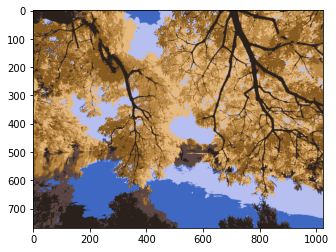

In [28]:
compress_image(r"sight_seeing.jpg", 7, 10, init_centroids='in_pixels')

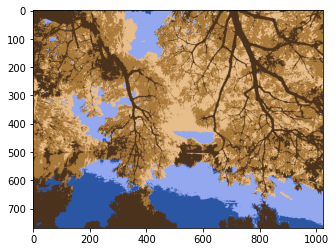

In [29]:
compress_image(r"sight_seeing.jpg", 5, 10, init_centroids='in_pixels')

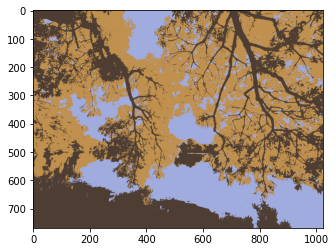

In [30]:
compress_image(r"sight_seeing.jpg", 3, 10, init_centroids='in_pixels')